In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%cd "C:\Users\gmcclelland\Desktop\Misc School Stuff\repo\CISC451\project\data"
%matplotlib inline

C:\Users\gmcclelland\Desktop\Misc School Stuff\repo\CISC451\project\data


## Simple EDA of Event-Driven Shot Data and Locations
Now that we have our datasets of interest for two NHL seasons, it is time to do some data exploration, let's start with individual events (where shots are of interest)

In [2]:
# let's get our selected datasets
plays = pd.read_csv('plays_2017-2018_2018-2019.csv')
# games = pd.read_csv('games_2017-2018_2018-2019.csv')
# skater_stats = pd.read_csv('skaterstats_2017-2018_2018-2019.csv')
# team_stats = pd.read_csv('teamstats_2017-2018_2018-2019.csv')
# s_info = pd.read_csv('player_info.csv') # static library of players
# t_info = pd.read_csv('team_info.csv') # static library of teams

In [3]:
# simple metadata
plays.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
0,2017030241_1,2017030241,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2018-04-26 23:34:04,0,0,Game Scheduled,NaN,NaN,NaN
1,2017030241_2,2017030241,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2018-04-27 02:09:49,0,0,Period Ready,NaN,NaN,NaN
2,2017030241_3,2017030241,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2018-04-27 02:09:51,0,0,Period Start,NaN,NaN,NaN
3,2017030241_4,2017030241,4,28.0,54.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2018-04-27 02:10:02,0,0,Joe Pavelski faceoff won against Jonathan Marc...,0.0,0.0,NaN
4,2017030241_5,2017030241,5,54.0,28.0,Hit,NaN,-31.0,-36.0,1,REGULAR,16,1184,2018-04-27 02:10:37,0,0,Brayden McNabb hit Joonas Donskoi,31.0,36.0,NaN


In [4]:
# percentage of null values by column
plays.isna().sum()/len(plays)

play_id                0.000000
game_id                0.000000
play_num               0.000000
team_id_for            0.191090
team_id_against        0.191090
event                  0.000000
secondaryType          0.783132
x                      0.192796
y                      0.192790
period                 0.000000
periodType             0.000000
periodTime             0.000000
periodTimeRemaining    0.000000
dateTime               0.000000
goals_away             0.000000
goals_home             0.000000
description            0.000000
st_x                   0.192796
st_y                   0.192790
rink_side              0.224316
dtype: float64

In [5]:
plays.event.unique()

array(['Game Scheduled', 'Period Ready', 'Period Start', 'Faceoff', 'Hit',
       'Shot', 'Stoppage', 'Penalty', 'Blocked Shot', 'Takeaway',
       'Giveaway', 'Missed Shot', 'Goal', 'Period End', 'Period Official',
       'Game End', 'Official Challenge', 'Game Official',
       'Shootout Complete', 'Early Intermission Start',
       'Early Intermission End', 'Emergency Goaltender'], dtype=object)

In [6]:
# so, there are many unique events that could be explored, let's look specifically at shots
shots = plays[(plays['event']=='Shot') | (plays['event']=='Missed Shot') | (plays['event']=='Blocked Shot')]
# while we're here, let's get all events that are goals too
goals = plays[plays['event']=='Goal']

In [7]:
# What are the different kinds of shots players take?
shots.secondaryType.unique()

array(['Wrist Shot', 'Deflected', nan, 'Slap Shot', 'Backhand',
       'Snap Shot', 'Wrap-around', 'Tip-In'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Wrist Shot'),
  Text(1, 0, 'Slap Shot'),
  Text(2, 0, 'Snap Shot'),
  Text(3, 0, 'Backhand'),
  Text(4, 0, 'Tip-In'),
  Text(5, 0, 'Deflected'),
  Text(6, 0, 'Wrap-around')])

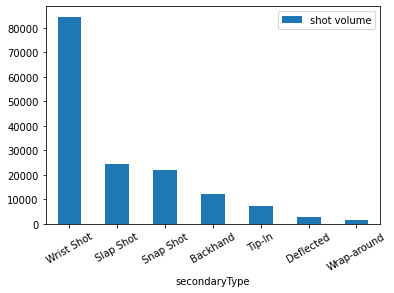

In [8]:
# let's look at the behaviour of each of these shot types based on volume of each shot type taken
s_volume = shots.groupby('secondaryType').size().to_frame('shot volume').sort_values(by='shot volume',ascending=False)
s_volume.plot(kind='bar')
plt.xticks(rotation=30)
#TODO: Plot needs more colour


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Wrist Shot'),
  Text(1, 0, 'Snap Shot'),
  Text(2, 0, 'Slap Shot'),
  Text(3, 0, 'Backhand'),
  Text(4, 0, 'Tip-In'),
  Text(5, 0, 'Deflected'),
  Text(6, 0, 'Wrap-around')])

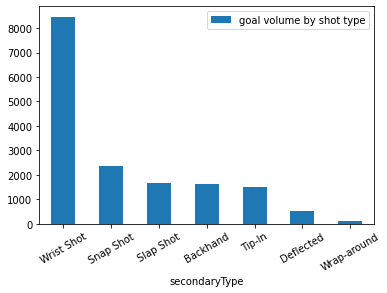

In [9]:
# Likewise, let's do the same with goals
g_volume = goals.groupby('secondaryType').size().to_frame('goal volume by shot type').sort_values(by='goal volume by shot type',ascending=False)
g_volume.plot(kind='bar')
plt.xticks(rotation=30)

Text(0.5, 1.0, 'Total Percent Conversion by Shot Type')

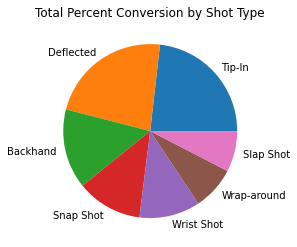

In [10]:
# next, let's get the conversion rate of each shot type as a %, meaning, on average, what is the percent chance that a shot of a certain type results in a goal, regardless of the location?

g_volume['shot volume'] = s_volume['shot volume']
g_volume['%conversion'] = round((g_volume['goal volume by shot type']/g_volume['shot volume'])*100,4) 
g_volume.sort_values(by='%conversion',ascending=False,inplace=True)
plt.pie(g_volume['%conversion'],labels=g_volume.index)
plt.title('Total Percent Conversion by Shot Type')

In [11]:
shots.isna().sum()/len(shots)

play_id                0.000000
game_id                0.000000
play_num               0.000000
team_id_for            0.000000
team_id_against        0.000000
event                  0.000000
secondaryType          0.480967
x                      0.000017
y                      0.000023
period                 0.000000
periodType             0.000000
periodTime             0.000000
periodTimeRemaining    0.000000
dateTime               0.000000
goals_away             0.000000
goals_home             0.000000
description            0.000000
st_x                   0.000017
st_y                   0.000023
rink_side              0.040218
dtype: float64

From the output above, note that roughly 48% of shots have a secondary type of NaN, and this is because they are either blocked or miss the net. It would be interesting to explore whether certain shots are more likely to miss the net or get blocked, but it appears as though this information is not available to us.

In [12]:
shots.loc[((shots.event == 'Blocked Shot') | (shots.event == 'Missed Shot')) & shots.secondaryType.notnull()]

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side


In [13]:
print(f"Percentage of total shots that are blocked: {round((len(shots.loc[shots.event == 'Blocked Shot'])/len(shots)),4)*100}% \nPercentage of total shots that miss the net: {round((len(shots.loc[shots.event == 'Missed Shot'])/len(shots)),4)*100}%")
# f"Percentage of total shots that miss the net: {round((len(shots.loc[shots.event == 'Missed Shot'])/len(shots)),2)*100}%"

Percentage of total shots that are blocked: 26.25% 
Percentage of total shots that miss the net: 21.84%


While we're here, let's visualize the locations of blocked shots and shots that miss the net:

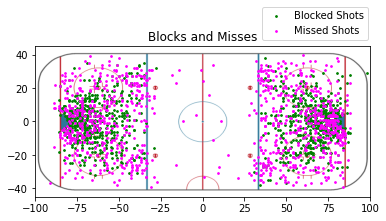

In [14]:
blocked = shots[shots['event']=='Blocked Shot']
blocked_sample = blocked.sample(n=1000, replace=False)
misses = shots[shots['event']=='Missed Shot']
misses_sample = misses.sample(n=1000, replace=False)
img = plt.imread("rink.png") # rink image taken from google
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -45, 45]) # re-sizing rink image to contain coordinates 
plt.scatter(blocked_sample['x'], blocked_sample['y'],s=3,label='Blocked Shots',color='green')
plt.scatter(misses_sample['x'], misses_sample['y'],s=3,label='Missed Shots',color='magenta')
plt.title('Blocks and Misses')
legend = ax.legend(loc='lower right',bbox_to_anchor= (1.01, 1.01))
plt.show()

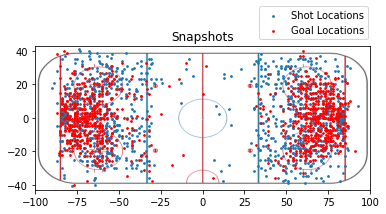

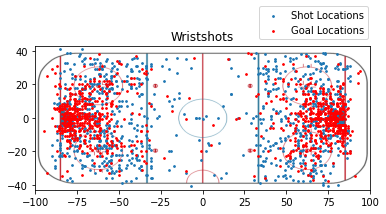

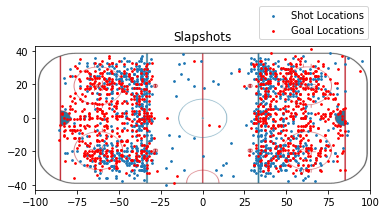

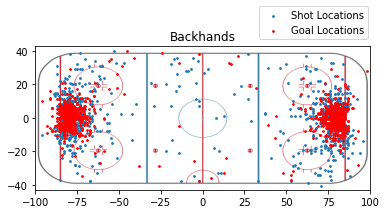

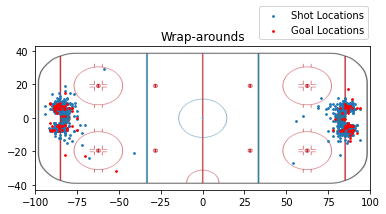

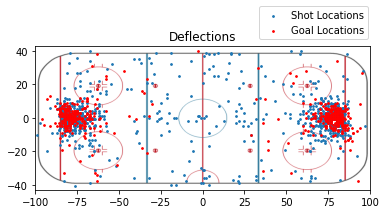

In [15]:
snapshots = shots[shots['secondaryType']=='Snap Shot']
snap_sample = snapshots.sample(n=1000, replace=False)
snap_goals = goals[goals['secondaryType']=='Snap Shot']
snap_goals_sample = snap_goals.sample(n=1000, replace=False)
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(snap_sample['x'], snap_sample['y'],s=3,label='Shot Locations')
plt.scatter(snap_goals_sample['x'], snap_goals_sample['y'],s=3,color='red',label='Goal Locations')
plt.title('Snapshots')
legend = ax.legend(loc='lower right',bbox_to_anchor= (1.01, 1.01))
plt.show()

wrist = shots[shots['secondaryType']=='Wrist Shot']
wrist_sample = wrist.sample(n=1000, replace=False)
wrist_goals = goals[goals['secondaryType']=='Wrist Shot']
wrist_goals_sample = wrist_goals.sample(n=1000, replace=False)
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(wrist_sample['x'], wrist_sample['y'],s=3,label='Shot Locations')
plt.scatter(wrist_goals_sample['x'], wrist_goals_sample['y'],s=3,color='red',label='Goal Locations')
plt.title('Wristshots')
legend = ax.legend(loc='lower right',bbox_to_anchor= (1.01, 1.01))
plt.show()

slap = shots[shots['secondaryType']=='Slap Shot']
slap_sample = slap.sample(n=1000, replace=False)
slap_goals = goals[goals['secondaryType']=='Slap Shot']
slap_goals_sample = slap_goals.sample(n=1000, replace=False)
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(slap_sample['x'], slap_sample['y'],s=3,label='Shot Locations')
plt.scatter(slap_goals_sample['x'], slap_goals_sample['y'],s=3,color='red',label='Goal Locations')
plt.title('Slapshots')
legend = ax.legend(loc='lower right',bbox_to_anchor= (1.01, 1.01))
plt.show()

bh = shots[shots['secondaryType']=='Backhand']
bh_sample = bh.sample(n=1000, replace=False)
bh_goals = goals[goals['secondaryType']=='Backhand']
bh_goals_sample = bh_goals.sample(n=1000, replace=False)
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(bh_sample['x'], bh_sample['y'],s=3,label='Shot Locations')
plt.scatter(bh_goals_sample['x'], bh_goals_sample['y'],s=3,color='red',label='Goal Locations')
plt.title('Backhands')
legend = ax.legend(loc='lower right',bbox_to_anchor= (1.01, 1.01))
plt.show()

wrap = shots[shots['secondaryType']=='Wrap-around']
wrap_sample = wrap.sample(n=1000, replace=False)
wrap_goals = goals[goals['secondaryType']=='Wrap-around']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(wrap_sample['x'], wrap_sample['y'],s=3,label='Shot Locations')
plt.scatter(wrap_goals['x'], wrap_goals['y'],s=3,color='red',label='Goal Locations')
plt.title('Wrap-arounds')
legend = ax.legend(loc='lower right',bbox_to_anchor= (1.01, 1.01))
plt.show()

deflections = shots[shots['secondaryType']=='Deflected']
def_sample = deflections.sample(n=1000, replace=False)
def_goals = goals[goals['secondaryType']=='Deflected']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(def_sample['x'], def_sample['y'],s=3,label='Shot Locations')
plt.scatter(def_goals['x'], def_goals['y'],s=3,color='red',label='Goal Locations')
plt.title('Deflections')
legend = ax.legend(loc='lower right',bbox_to_anchor= (1.01, 1.01))
plt.show()

That's a lot of events in just a few visuals, so let's breakdown what we can see here:

    - snapshots and wristshots can come from pretty much anywhere, and they are the most common

    - slapshots are typically taken from closer to the blueline, which we can see in the visual

    - backhands typically come from closer to the net, as they are weaker than others, as is the same with wrap-arounds (behind the net to the front), and deflections from shots that are taken from farther out (slapshots)

Further analysis will entail the use of these event-based shot data to support models at a higher-level of abstraction focused on predicting the outcome of a hockey match